In [1]:
from tensorflow.keras.datasets.fashion_mnist import load_data
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.backend import one_hot

In [2]:
ass_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [3]:
(train_images,train_labels),(test_images,test_labels) = load_data()

In [4]:
train_labels = one_hot(train_labels,10)
test_labels = one_hot(test_labels,10)

In [5]:
sess = tf.Session()
train_labels = sess.run(train_labels)
test_labels = sess.run(test_labels)

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
train_labels.shape

(60000, 10)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
test_labels.shape

(10000, 10)

In [10]:
x_train = train_images
y_train = train_labels 
x_test = test_images
y_test  = test_labels

In [11]:
x_train = train_images.reshape(-1,28*28)

In [12]:
x_test = test_images.reshape(-1,28*28)

In [13]:
x_train.shape

(60000, 784)

In [14]:
y_test.shape

(10000, 10)

In [15]:
x = tf.placeholder(tf.float32,[None,784])
y = tf.constant(y_train, tf.float32)

In [16]:
w1 = tf.get_variable( 'w1',[784,900], initializer=tf.contrib.layers.xavier_initializer()) 
b1 = tf.get_variable( 'b1',[900], initializer=tf.contrib.layers.xavier_initializer())
w2 = tf.get_variable( 'w2',[900,10], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.get_variable( 'b2',[10], initializer=tf.contrib.layers.xavier_initializer())

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [17]:
z1 = tf.matmul(x,w1)+b1
lay1 = tf.nn.softmax(z1)
z2 = tf.matmul(lay1,w2)+b2
hx = tf.nn.softmax(z2)

In [18]:
cost_i=tf.nn.softmax_cross_entropy_with_logits(logits=z2,labels=y)
cost = tf.reduce_mean( cost_i )

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [19]:
optimizer = tf.train.AdamOptimizer(0.1) #learning rate
train = optimizer.minimize(cost)
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [20]:
for i in range(500):
    sess.run(train,{x:x_train})
    print(i,sess.run(cost, {x:x_train}))

0 2.2330909
1 2.1514318
2 2.1057494
3 2.0903027
4 2.0657592
5 2.003441
6 1.8378171
7 1.806813
8 1.6674846
9 1.5873214
10 1.486136
11 1.4279896
12 1.3427323
13 1.2891607
14 1.2696795
15 1.1820841
16 1.1396698
17 1.0939533
18 1.0461074
19 1.0061703
20 1.0252901
21 0.9975697
22 0.99871665
23 0.9398017
24 0.927053
25 0.9525389
26 0.9179037
27 0.90297306
28 0.9265363
29 0.9285327
30 0.911327
31 0.8747815
32 0.8590634
33 0.8576382
34 0.88759637
35 0.91735744
36 0.87612617
37 0.8342428
38 0.83304244
39 0.86203194
40 0.9075725
41 0.9372889
42 0.9236599
43 0.9257243
44 0.8898343
45 0.8723159
46 0.8977866
47 0.93104094
48 0.9592836
49 1.0031507
50 1.0005876
51 0.9530507
52 0.9417314
53 0.9167721
54 0.8959838
55 0.8570818
56 0.8552382
57 0.8782647
58 0.8948949
59 0.8828409
60 0.87718284
61 0.8747751
62 0.8901772
63 0.93120116
64 0.9305255
65 0.8952165
66 0.85803664
67 0.8584394
68 0.8798647
69 0.9150594
70 0.95453686
71 0.9649211
72 0.95865405
73 0.9531782
74 0.9734697
75 0.9442206
76 0.9399247
7

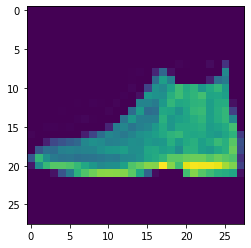

In [21]:
plt.imshow( x_test[0].reshape(28,28))
plt.show()

In [27]:
sess.run(hx,{x:x_test[[0]]})

array([[2.9397380e-04, 2.3162369e-04, 1.7423768e-04, 2.6841517e-04,
        2.3419425e-04, 1.7457417e-01, 3.1807434e-04, 4.6313081e-02,
        5.8302598e-04, 7.7700925e-01]], dtype=float32)

In [28]:
sess.run(hx,{x:x_test[[0]]}).argmax( axis=1)

array([9], dtype=int64)

In [29]:
aa = sess.run(hx,{x:x_test[[0]]})
a = aa.argmax(axis=1)
b = y_test.argmax(axis=1)
(a==b).mean()

0.1

In [33]:
b.shape

(10000,)